In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime 
import locale
locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [3]:
hj = pd.read_excel('급속충전이용내역_환경부_18.01-19.10.xlsx', encoding = "CP949")
hg = pd.read_excel('급속충전이용내역_한전_18.01-19.10.xlsx', encoding = "CP949")

In [4]:
hj2 = hj.copy()
hg2 = hg.copy()

hj2.rename(columns = {
    '충전소명' : '충전소',
    '충전소대분류' : '용도',
    '충전시작시간' : '충전날짜',
    '충전량(kWh)' : '충전량_kWh'
}, inplace = True)

hg2.rename(columns = {
    '용도별' : '용도',
    '충전소 구축일' : '설치년도',
    '시작일시' : '충전날짜',
    '충전량(kWh)' : '충전량_kWh'
}, inplace = True)

In [5]:
hj2.head()

,번호,용도,충전소,주소,설치년도,충전기타입,충전량_kWh,충전날짜,충전종료시간
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847
1,2,공공시설,중부지방고용노동청 별관 앞,인천광역시 남동구 구월3동 1111-6 중부지방고용노동청 별관 앞,2017,DC차데모+AC3상+DC콤보,2.05,20180101041556,20180101042036
2,3,주차시설,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,2017,DC차데모+AC3상+DC콤보,16.95,20180101043214,20180101050354
3,4,휴게시설,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,2017,DC차데모+AC3상+DC콤보,16.50,20180101051131,20180101054151
4,5,휴게시설,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,2017,DC차데모+AC3상+DC콤보,14.41,20180101074307,20180101081251


In [6]:
hg2.head()

,번호,용도,충전소,주소,설치년도,충전구분,충전량_kWh,충전날짜
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36
1,2,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,12.86,2018-01-02 09:16:04
2,3,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,16.10,2018-01-04 14:00:49
3,4,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,13.94,2018-01-09 12:58:46
4,5,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,16.06,2018-01-09 20:48:46


In [7]:
hj2 = hj2.loc[:, ['충전소', '주소', '용도','설치년도', '충전량_kWh', '충전날짜']]
hg2 = hg2.loc[:, ['충전소', '주소', '용도', '설치년도','충전량_kWh', '충전날짜']]

hg2['설치년도'] = list(map(lambda x : x.split('-')[0], hg2['설치년도']))

hj2['충전날짜'] = list(map(lambda x : str(x), hj2['충전날짜'] ))
hj2['충전날짜'] = list(map(lambda x : x[2:10], hj2['충전날짜'] ))

hg2['충전날짜'] = list(map(lambda x : x.split(' ')[0].replace('-', '')[2:] + x.split(' ')[1].replace(':', '')[:2], hg2['충전날짜'] ))

hj2['연도'] = list(map(lambda x : x[:2], hj2['충전날짜']))
hj2['연월'] = list(map(lambda x : x[:4], hj2['충전날짜']))
hj2['연월일'] = list(map(lambda x : x[:6], hj2['충전날짜']))
hj2['월'] = list(map(lambda x : x[2:4], hj2['충전날짜']))
hj2['시간'] = list(map(lambda x : x[6:], hj2['충전날짜']))
hj2['시간'] = list(map(lambda x : int(x) , hj2['시간']))

hg2['연도'] = list(map(lambda x : x[:2], hg2['충전날짜']))
hg2['연월'] = list(map(lambda x : x[:4], hg2['충전날짜']))
hg2['연월일'] = list(map(lambda x : x[:6], hg2['충전날짜']))
hg2['월'] = list(map(lambda x : x[2:4], hg2['충전날짜']))
hg2['시간'] = list(map(lambda x : x[6:], hg2['충전날짜']))
hg2['시간'] = list(map(lambda x : int(x) , hg2['시간']))

In [8]:
hj2.head(1)

,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,교육문화시설,2017,7.02,18010103,18,1801,180101,01,3


In [9]:
hg2.head(1)

,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,17.21,18010109,18,1801,180101,01,9


In [10]:
hj3 = hj2.copy()

hj4 = hj3.drop(hj3[hj3['연월'] == '1910'].index, 0)
hj4.index = range(len(hj4))
hj4.shape

(54475, 11)

In [11]:
use_ch = pd.concat([hg2, hj4], axis = 0, ignore_index = True)
print(use_ch.shape)
use_ch.head(5)

(89531, 11)


,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,17.21,18010109,18,1801,180101,01,9
1,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,12.86,18010209,18,1801,180102,01,9
2,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,16.10,18010414,18,1801,180104,01,14
3,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,13.94,18010912,18,1801,180109,01,12
4,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,16.06,18010920,18,1801,180109,01,20


In [12]:
temp_bindo = pd.DataFrame(use_ch.groupby(['충전소']).size(), columns = ['빈도'])
temp_bindo

,빈도
충전소,
G-Tower(경제자유구역청),1261
LH인천본부,3078
lh웨스턴블루힐,83
㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,631
가정뉴서울아파트,41
가좌2동 행정복지센터,373
간석래미안자이,94
갈산역 공영주차장,161
갈산이안 아파트,1


In [13]:
temp_ch = pd.DataFrame(use_ch.groupby(['충전소']).sum())
temp_ch['충전소'] = temp_ch.index
temp_ch.index = range(len(temp_ch))
temp_ch = temp_ch.loc[:, ['충전소', '충전량_kWh']]
temp_ch

,충전소,충전량_kWh
0,G-Tower(경제자유구역청),30259.44
1,LH인천본부,63815.83
2,lh웨스턴블루힐,2270.30
3,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,10161.50
4,가정뉴서울아파트,858.89
5,가좌2동 행정복지센터,6847.91
6,간석래미안자이,2547.22
7,갈산역 공영주차장,3282.86
8,갈산이안 아파트,0.54
9,강화군청,29291.07


In [14]:
temp_two = pd.merge(temp_ch, temp_bindo, on = '충전소', how = 'left')
temp_two

,충전소,충전량_kWh,빈도
0,G-Tower(경제자유구역청),30259.44,1261
1,LH인천본부,63815.83,3078
2,lh웨스턴블루힐,2270.30,83
3,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,10161.50,631
4,가정뉴서울아파트,858.89,41
5,가좌2동 행정복지센터,6847.91,373
6,간석래미안자이,2547.22,94
7,갈산역 공영주차장,3282.86,161
8,갈산이안 아파트,0.54,1
9,강화군청,29291.07,1397


In [15]:
temp_name = []
temp_il = []
for i in use_ch.sort_values(['충전소'])['충전소'].unique() :
    temp_name.append(i)
    temp_il.append(len(use_ch.loc[use_ch['충전소'] == i, '연월일'].unique()) )
temp_day = pd.DataFrame([temp_name, temp_il], index = ['충전소', '충전일수']).T
temp_day

,충전소,충전일수
0,G-Tower(경제자유구역청),408
1,LH인천본부,612
2,lh웨스턴블루힐,74
3,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,363
4,가정뉴서울아파트,40
5,가좌2동 행정복지센터,177
6,간석래미안자이,84
7,갈산역 공영주차장,114
8,갈산이안 아파트,1
9,강화군청,517


In [16]:
temp_three = pd.merge(temp_two, temp_day, on = '충전소', how = 'left')
temp_three

,충전소,충전량_kWh,빈도,충전일수
0,G-Tower(경제자유구역청),30259.44,1261,408
1,LH인천본부,63815.83,3078,612
2,lh웨스턴블루힐,2270.30,83,74
3,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,10161.50,631,363
4,가정뉴서울아파트,858.89,41,40
5,가좌2동 행정복지센터,6847.91,373,177
6,간석래미안자이,2547.22,94,84
7,갈산역 공영주차장,3282.86,161,114
8,갈산이안 아파트,0.54,1,1
9,강화군청,29291.07,1397,517


In [17]:
df = pd.read_excel("인천시_2km_충도변전인주음학민SN경마교공.xlsx", encoding = "CP949")
#df = pd.read_csv("인천시_2km_충도변전인주음학민SN경마교공.csv", encoding = "CP949")
df.head(1)

,충전소,충전량_kWh,충전일수,주소,X좌표,Y좌표,시군구명,도서관,변압기,전기차,경제인구수,주차면수,건물수,음식점,학교,민행기_SN,경기장,대형마트,교통량,공원
0,G-Tower(경제자유구역청),30259.44,408,인천광역시 연수구 아트센터대로 175,126.63379,37.39574,연수구,3,272,124,58789,81883,74,693,14,6,0,3,1440,0


In [18]:
#df = pd.read_csv("인천시_2km_충도변전인주음학민SN경마교공.csv", encoding = "CP949")
df.head(3)

,충전소,충전량_kWh,충전일수,주소,X좌표,Y좌표,시군구명,도서관,변압기,전기차,경제인구수,주차면수,건물수,음식점,학교,민행기_SN,경기장,대형마트,교통량,공원
0,G-Tower(경제자유구역청),30259.44,408,인천광역시 연수구 아트센터대로 175,126.63379,37.39574,연수구,3,272,124,58789,81883,74,693,14,6,0,3,1440,0
1,LH인천본부,63815.83,612,인천광역시 남동구 논현로46번길 23,126.71239,37.40086,남동구,4,1595,81,69330,68084,142,764,19,12,0,2,1232,13
2,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,10538.65,375,인천광역시 서구 원삭로 160 주차장 입구 우측 완속충전기 옆,126.66633,37.56302,서구,5,376,54,54392,40092,104,455,12,5,1,0,1303,9


In [19]:
name_order = ['충전소', '충전량_kWh', '충전일수','빈도', '주소', 'X좌표', 'Y좌표', '시군구명', '도서관', '변압기',
       '전기차', '경제인구수', '주차면수', '건물수', '음식점', '학교', '민행기_SN', '경기장', '대형마트',
       '교통량', '공원']

In [20]:
df = pd.merge( df.loc[:, (list(set(df.columns) - set(['충전량_kWh','충전일수'])))] , temp_three, on='충전소', how = 'left')
df = df.loc[:, name_order]
df

,충전소,충전량_kWh,충전일수,빈도,주소,X좌표,Y좌표,시군구명,도서관,변압기,...,경제인구수,주차면수,건물수,음식점,학교,민행기_SN,경기장,대형마트,교통량,공원
0,G-Tower(경제자유구역청),30259.44,408,1261,인천광역시 연수구 아트센터대로 175,126.63379,37.39574,연수구,3,272,...,58789,81883,74,693,14,6,0,3,1440,0
1,LH인천본부,63815.83,612,3078,인천광역시 남동구 논현로46번길 23,126.71239,37.40086,남동구,4,1595,...,69330,68084,142,764,19,12,0,2,1232,13
2,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,10161.50,363,631,인천광역시 서구 원삭로 160 주차장 입구 우측 완속충전기 옆,126.66633,37.56302,서구,5,376,...,54392,40092,104,455,12,5,1,0,1303,9
3,가좌2동 행정복지센터,6847.91,177,373,인천광역시 서구 가좌동 30-105,126.68485,37.49084,서구,13,1022,...,103367,21069,98,983,28,11,3,1,932,11
4,갈산역 공영주차장,3282.86,114,161,인천광역시 부평구 갈산동 192,126.72349,37.51556,부평구,6,1438,...,265372,535052,317,2489,40,32,1,3,1107,16
5,강화군청,29291.07,517,1397,"인천광역시 강화군 강화읍 강화대로 394 (관청리, 강화군청)",126.48773,37.74613,강화군,1,137,...,13840,747,6,416,9,9,2,0,326,4
6,강화지사,10877.10,342,504,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",126.49913,37.74187,강화군,1,138,...,13732,747,6,415,5,9,0,0,366,3
7,강화풍물시장 공영주차장,26489.12,567,1676,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,126.49287,37.74142,강화군,1,145,...,14687,805,7,429,8,9,0,0,401,3
8,검단2공영주차장,41420.90,599,2351,인천광역시 서구 당하동 1097-5 검단4동 주민센터 옆,126.67502,37.59202,서구,9,427,...,69679,7554,23,656,13,4,0,1,1061,6
9,계산1택지 공영주차장,26330.43,575,1640,인천광역시 계양구 계산동 1060 구두수선방 옆,126.73676,37.54099,계양구,2,886,...,179417,60489,112,1961,38,21,4,3,1328,29


In [21]:
df_pb = df.iloc[:, 0:4]
df_pb['일평균충전량'] = df_pb['충전량_kWh'] / df_pb['충전일수']
df_pb['일평균빈도'] = df_pb['빈도'] / df_pb['충전일수']
df_pb

,충전소,충전량_kWh,충전일수,빈도,일평균충전량,일평균빈도
0,G-Tower(경제자유구역청),30259.44,408,1261,74.1653,3.09069
1,LH인천본부,63815.83,612,3078,104.274,5.02941
2,㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구,10161.50,363,631,27.9931,1.73829
3,가좌2동 행정복지센터,6847.91,177,373,38.6888,2.10734
4,갈산역 공영주차장,3282.86,114,161,28.797,1.41228
5,강화군청,29291.07,517,1397,56.6558,2.70213
6,강화지사,10877.10,342,504,31.8044,1.47368
7,강화풍물시장 공영주차장,26489.12,567,1676,46.718,2.95591
8,검단2공영주차장,41420.90,599,2351,69.1501,3.92487
9,계산1택지 공영주차장,26330.43,575,1640,45.7921,2.85217


In [22]:
day_ch = df_pb.sort_values(['일평균충전량'], ascending = False)
day_ch.index = range(1, len(day_ch) +1 )
day_ch_10 = day_ch.loc[:10, ['충전소', '일평균충전량']] 
day_ch_10['순위'] = list(map(lambda x : str(x) + '위', list(day_ch_10.index)))
day_ch_10

,충전소,일평균충전량,순위
1,인천아시아드주경기장 D1주차장,151.145,1위
2,인천시청,121.893,2위
3,인천경제산업정보테크노파크,117.894,3위
4,홈플러스 인천연수점,108.664,4위
5,LH인천본부,104.274,5위
6,롯데마트 청라점,96.7627,6위
7,남인천지사,90.6271,7위
8,중부지방고용노동청 별관 앞,80.3466,8위
9,연세대학교 국제캠퍼스,79.5107,9위
10,계양구청,77.6205,10위


In [23]:
day_cnt = df_pb.sort_values(['일평균빈도'], ascending = False)
day_cnt.index = range(1, len(day_cnt)+1)
day_cnt_10 = day_cnt.loc[:10, ['충전소', '일평균빈도']]
day_cnt_10['순위'] = list(map(lambda x : str(x) + '위', list(day_cnt_10.index)))
day_cnt_10

,충전소,일평균빈도,순위
1,인천아시아드주경기장 D1주차장,7.44737,1위
2,인천시청,7.12027,2위
3,롯데마트 청라점,5.87627,3위
4,LH인천본부,5.02941,4위
5,중부지방고용노동청 별관 앞,4.83065,5위
6,연세대학교 국제캠퍼스,4.736,6위
7,인천경제산업정보테크노파크,4.6341,7위
8,청라에너지,4.12069,8위
9,영종대교 휴게소 주차장,4.04007,9위
10,홈플러스 인천연수점,3.99287,10위


In [24]:
day_ch_10 = day_ch_10.loc[:, ['순위', '충전소', '일평균충전량']]
day_cnt_10 = day_cnt_10.loc[:, ['순위', '충전소', '일평균빈도']]

In [25]:
day_ch_10

,순위,충전소,일평균충전량
1,1위,인천아시아드주경기장 D1주차장,151.145
2,2위,인천시청,121.893
3,3위,인천경제산업정보테크노파크,117.894
4,4위,홈플러스 인천연수점,108.664
5,5위,LH인천본부,104.274
6,6위,롯데마트 청라점,96.7627
7,7위,남인천지사,90.6271
8,8위,중부지방고용노동청 별관 앞,80.3466
9,9위,연세대학교 국제캠퍼스,79.5107
10,10위,계양구청,77.6205


In [26]:
day_cnt_10

,순위,충전소,일평균빈도
1,1위,인천아시아드주경기장 D1주차장,7.44737
2,2위,인천시청,7.12027
3,3위,롯데마트 청라점,5.87627
4,4위,LH인천본부,5.02941
5,5위,중부지방고용노동청 별관 앞,4.83065
6,6위,연세대학교 국제캠퍼스,4.736
7,7위,인천경제산업정보테크노파크,4.6341
8,8위,청라에너지,4.12069
9,9위,영종대교 휴게소 주차장,4.04007
10,10위,홈플러스 인천연수점,3.99287


In [27]:
#df_pb.to_csv("12.27 일평균충전량 및 빈도.csv", encoding = "CP949", index = False)
#day_ch_10.to_csv("12.27 일평균충전량 Top10.csv", encoding = "CP949", index = False)
#day_cnt_10.to_csv("12.27 일평균빈도 Top10.csv", encoding = "CP949", index = False)

In [28]:
df.shape

(84, 21)

## 충전일수 충전량 도서관 변압기 전기차 경제인구수
## 주차면수 공원 음식점 학교 민행기_ SN 경기장 대형마트 교통량

In [29]:
#'충전일수', '충전량_kWh', '도서관', '변압기', '전기차', '경제인구수',
#'주차면수', '공원', '음식점', '학교', '민행기_ SN', '경기장' ,'대형마트', '교통량'

In [30]:
col_li = ['충전일수', '충전량_kWh', '도서관', '변압기', '전기차', '경제인구수','주차면수', '공원', '음식점', '학교', 
          '민행기_SN', '경기장' ,'대형마트', '교통량']
col_li

['충전일수',
 '충전량_kWh',
 '도서관',
 '변압기',
 '전기차',
 '경제인구수',
 '주차면수',
 '공원',
 '음식점',
 '학교',
 '민행기_SN',
 '경기장',
 '대형마트',
 '교통량']

In [31]:
df2 = df.loc[:, col_li]
df2.head(1)

,충전일수,충전량_kWh,도서관,변압기,전기차,경제인구수,주차면수,공원,음식점,학교,민행기_SN,경기장,대형마트,교통량
0,408,30259.44,3,272,124,58789,81883,0,693,14,6,0,3,1440


In [32]:
df2['일당충전량'] = df2['충전량_kWh'] / df2['충전일수']
df2['일당충전량'] = list(map(lambda x : np.float(x), df2['일당충전량']))
df2.head(1)

,충전일수,충전량_kWh,도서관,변압기,전기차,경제인구수,주차면수,공원,음식점,학교,민행기_SN,경기장,대형마트,교통량,일당충전량
0,408,30259.44,3,272,124,58789,81883,0,693,14,6,0,3,1440,74.165294


In [33]:
df2.corr()

,충전량_kWh,도서관,변압기,전기차,경제인구수,주차면수,공원,음식점,학교,민행기_SN,경기장,대형마트,교통량,일당충전량
충전량_kWh,1.000000,0.080978,0.193822,0.282187,0.161148,0.067693,0.014867,0.208603,0.180649,0.122350,0.007613,0.317496,0.308293,0.842292
도서관,0.080978,1.000000,0.434632,0.394660,0.347180,0.072376,0.214853,0.403480,0.415815,0.453536,0.265079,0.156316,0.376142,0.101336
변압기,0.193822,0.434632,1.000000,0.629277,0.843638,0.495771,0.550321,0.831635,0.856039,0.791065,0.446049,0.580940,0.549955,0.161295
전기차,0.282187,0.394660,0.629277,1.000000,0.711136,0.435653,0.506606,0.629609,0.743620,0.592026,0.365186,0.765215,0.756749,0.278228
경제인구수,0.161148,0.347180,0.843638,0.711136,1.000000,0.504882,0.705884,0.913803,0.927038,0.782659,0.476069,0.627407,0.620480,0.138390
주차면수,0.067693,0.072376,0.495771,0.435653,0.504882,1.000000,0.261937,0.346947,0.456692,0.300306,0.027679,0.484937,0.272028,0.069953
공원,0.014867,0.214853,0.550321,0.506606,0.705884,0.261937,1.000000,0.524986,0.694222,0.451926,0.459792,0.425123,0.438199,0.016387
음식점,0.208603,0.403480,0.831635,0.629609,0.913803,0.346947,0.524986,1.000000,0.880707,0.903813,0.567689,0.552818,0.556481,0.185667
학교,0.180649,0.415815,0.856039,0.743620,0.927038,0.456692,0.694222,0.880707,1.000000,0.855277,0.595825,0.662602,0.586329,0.133838
민행기_SN,0.122350,0.453536,0.791065,0.592026,0.782659,0.300306,0.451926,0.903813,0.855277,1.000000,0.636854,0.442851,0.417634,0.117794


## 총충전량과 변수들의 상관계수

In [34]:
weight1 = pd.DataFrame(df2.corr().iloc[1, 2:-1])
weight1.rename(columns = {
    '충전량_kWh' : '충전량과 상관계수'
}, inplace = True)
weight1

,도서관
변압기,0.434632
전기차,0.394660
경제인구수,0.347180
주차면수,0.072376
공원,0.214853
음식점,0.403480
학교,0.415815
민행기_SN,0.453536
경기장,0.265079
대형마트,0.156316


## 일당충전량과 변수들의 상관계수

In [35]:
weight2 = pd.DataFrame(df2.corr().iloc[-1, 1:-1])
weight2.rename(columns = {
    '일당충전량' : '일당충전량과 상관계수'
}, inplace = True)
weight2

,일당충전량과 상관계수
도서관,0.101336
변압기,0.161295
전기차,0.278228
경제인구수,0.138390
주차면수,0.069953
공원,0.016387
음식점,0.185667
학교,0.133838
민행기_SN,0.117794
경기장,0.030548


## 공원과 충전량 산점도

In [36]:
df3 = df2.loc[: , ["충전량_kWh", "일당충전량", "공원"]]
df3.head(1)

,충전량_kWh,일당충전량,공원
0,30259.44,74.165294,0


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False  

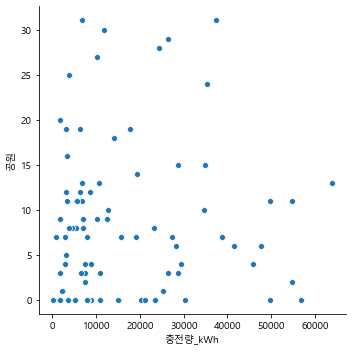

In [38]:
sns.relplot(x = "충전량_kWh", y = "공원", data = df3)
plt.show()

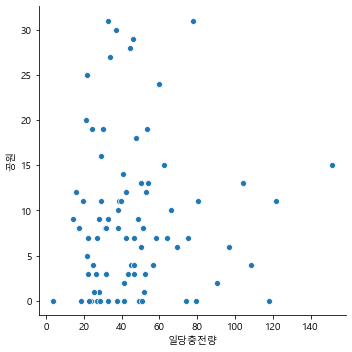

In [39]:
sns.relplot(x = "일당충전량", y = "공원", data = df3 )
plt.show()

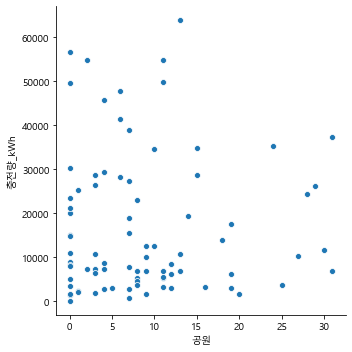

In [40]:
sns.relplot(x = "공원", y = "충전량_kWh", data = df3)
plt.show()

# 격자 데이터 가져오기

In [41]:
col_li.insert(0, 'gid')

In [50]:
gdf = pd.read_excel("인천시 격자 변수별 개수.xlsx", encoding = "CP949")

In [51]:
#gdf = pd.read_csv("인천시 격자 변수별 개수.csv", encoding = "CP949")

In [52]:
#gdf = pd.read_csv("인천시_격자_g인도변전충주학민SN공음경마교공.csv", encoding = "CP949")
print(gdf.shape)
gdf.head(1)

(19789, 17)


,gid,경제인구수,도서관,변압기,전기차,충전량_kWh,충전일수,충전소,주차면수,건물수,학교,민행기_SN,음식점,경기장,대형마트,교통량,공원
0,가사46aa99bb,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
gdf = gdf.loc[:, col_li]

In [ ]:
gdf.head()

In [ ]:
gt = gdf.copy()

In [ ]:
gt['공원'].describe()

In [ ]:
gt['공원'].unique()

In [ ]:
len(gt[gt['공원'] == 0])

In [ ]:
len(gt[gt['공원'] != 0])

In [ ]:
gt['공원'].unique()[0]
for i in range(3) :
    print( i, "의 개수", len(gt[gt['공원'] == gt['공원'].unique()[i]]), "\n\n")

In [ ]:
gt[gt['공원'] == 6]

In [ ]:
gdf.iloc[18202,:]

In [ ]:
gdf_nor = gdf.copy()

for i in gdf_nor.columns[1:] :
    gdf_nor[i] = gdf_nor[i] / (gdf_nor[i].max() - gdf_nor[i].min())
gdf_nor.sort_values(['경제인구수'], ascending = True)

In [ ]:
Score1 = pd.DataFrame(np.array(gdf_nor.iloc[:,3:]).dot(np.array(weight1)))
Score1

In [ ]:
Score2 = pd.DataFrame(np.array(gdf_nor.iloc[:,3:]).dot(np.array(weight2)))
Score2

In [ ]:
gdf['Score1'] = Score1
gdf['Score2'] = Score2

In [ ]:
gdf.sort_values(['Score1', 'Score2'], ascending = False)

In [ ]:
(gdf['Score1'].unique())

In [ ]:
gdf.loc[gdf['Score1'] == 0, 'Score1']

In [ ]:
gdf.loc[gdf['Score2'] == 0, 'Score2']

In [ ]:
gdf

In [ ]:
(gdf[ gdf['Score1'] < 0])

In [ ]:
gdf[gdf['Score2'] < 0]

In [ ]:
temp_t = pd.read_csv("국사유지구분.csv", encoding = "CP949")

In [ ]:
temp_t

In [ ]:
temp_t['A21'].unique()

In [ ]:
#gdf.to_csv("19.12.09 Gid별 Score 추가.csv", encoding = "CP949", index = False)